In [1]:
#Importing Necessary Libraries
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
%matplotlib inline

import plotly
import plotly.express as px
import plotly.graph_objects as go
plt.rcParams['figure.figsize']=17,8


In [2]:
#Loading Data
path=r"Downloads\Order report 60 days - Sweebon India MasteR (1).xlsx"
path2=r"Downloads\Sponsored Products Search term report.xlsx"

order=pd.read_excel(path)
sponsored=pd.read_excel(path2)

In [3]:
order.head()

,order-id,order-item-id,purchase-date,sku,product-name,quantity-purchased,item-price,item-tax,shipping-price,shipping-tax,ship-city,ship-state,is-business-order,Unnamed: 13,total
0,406-1284116-6591518,60935782456835,2020-07-05T01:35:43+00:00,Gluten Free-Jaggery_Biscuit,The Bread CoMADHYA PRADESHany Gluten Free Seve...,11,1925.0,293.59,0,0.0,PIMADHYA PRADESHRI CHINCHWAD,MAHARASHTRA,False,NaN,NaN
1,171-8948119-8268311,22826401882155,2020-06-25T04:44:56+00:00,TBCCOOKIES_04,The Bread CoMADHYA PRADESHany Natural & Organi...,10,1950.0,297.50,0,0.0,MOHALI,PUNJAB,False,NaN,NaN
2,171-6191603-4480323,26603830445171,2020-07-07T02:09:02+00:00,Flax Seeds-200 gm,"The Bread CoMADHYA PRADESHany Flax Seeds, 200gm",10,1300.0,198.30,0,0.0,KARUNAGANDHRA PRADESHPALLY,KERALA,False,NaN,NaN
3,408-8286787-0361917,9002904912763,2020-05-15T09:05:41+00:00,Gluten Free-Jaggery_Biscuit,The Bread CoMADHYA PRADESHany Gluten Free Seve...,6,1050.0,160.20,0,0.0,DELHI,DELHI,False,NaN,NaN
4,406-8537485-7055561,49841839828459,2020-06-04T15:23:10+00:00,Seven SUTTAR PRADESHergrains-pack of 2,The Bread CoMADHYA PRADESHany Gluten Free Cook...,6,2070.0,315.78,0,0.0,HOWRAH,WEST BENGAL,False,NaN,NaN


In [4]:
order.shape

(3343, 15)

In [5]:
order.describe()

,order-item-id,quantity-purchased,item-price,item-tax,shipping-price,shipping-tax,Unnamed: 13,total
count,3.343000e+03,3343.000000,3343.000000,3343.000000,3343.000000,3343.000000,0.0,0.0
mean,3.486349e+13,1.131618,315.126518,44.228166,3.010769,0.448824,NaN,NaN
std,2.037644e+13,0.533747,181.305992,28.389251,8.416194,1.266816,NaN,NaN
min,1.411772e+10,1.000000,70.000000,8.570000,0.000000,0.000000,NaN,NaN
25%,1.762990e+13,1.000000,195.000000,26.690000,0.000000,0.000000,NaN,NaN
50%,3.417016e+13,1.000000,295.000000,45.000000,0.000000,0.000000,NaN,NaN
75%,5.270703e+13,1.000000,325.000000,48.050000,0.000000,0.000000,NaN,NaN
max,7.030771e+13,11.000000,3190.000000,486.620000,35.000000,5.340000,NaN,NaN


In [6]:
order.columns

Index(['order-id', 'order-item-id', 'purchase-date', 'sku', 'product-name',
       'quantity-purchased', 'item-price', 'item-tax', 'shipping-price',
       'shipping-tax', 'ship-city', 'ship-state', 'is-business-order',
       'Unnamed: 13', 'total'],
      dtype='object')

In [7]:
#Repalcing places that are the same
order.replace(to_replace =["AP"],  
                            value ="ANDHRA PRADESH",inplace=True)
order.replace(to_replace =["JK"],  
                            value ="JAMMU & KASHMIR",inplace=True)
order.replace(to_replace =["M.P."],  
                            value ="MADHYA PRADESH",inplace=True)
order.replace(to_replace =["maharashrtra"],  
                            value ="MAHARASHTRA",inplace=True)
order.replace(to_replace =["maharastra"],  
                            value ="MAHARASHTRA",inplace=True)
order.replace(to_replace =["MH"],  
                            value ="MEGHALAYA",inplace=True)
order.replace(to_replace =["MP"],  
                            value ="MADHYA PRADESH",inplace=True)
order.replace(to_replace =["Tamilnadu"],  
                            value ="TAMIL NADU",inplace=True)
order.replace(to_replace =["TN"],  
                            value ="TELANGANA",inplace=True)
order.replace(to_replace =["UP"],  
                            value ="UTTAR PRADESH",inplace=True)
order.replace(to_replace =["WB"],  
                            value ="WEST BENGAL",inplace=True)
order.replace(to_replace =["Puducheri"],  
                            value ="PUDUCHERRYL",inplace=True)
order.replace(to_replace =["tamil nadu"],  
                            value ="TAMIL NADU",inplace=True)
order.replace(to_replace =["Bihar"],  
                            value ="BIHAR",inplace=True)

In [8]:
order.drop(["is-business-order","total"],axis=1,inplace=True)

In [9]:
df2=order.iloc[:,-1:]

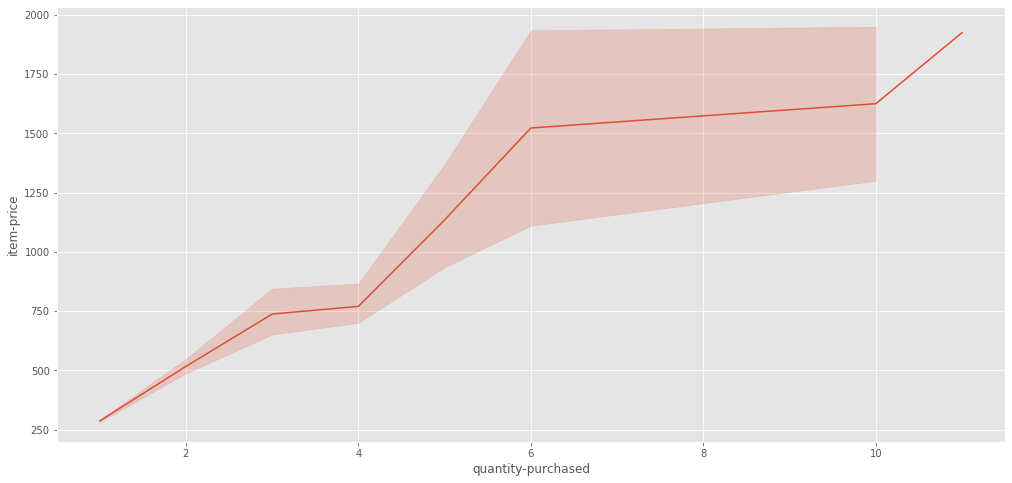

In [10]:
import seaborn as sns
sns.lineplot(x=order["quantity-purchased"], y=order["item-price"], data=order)

In [11]:
#Highest quantity purchased was from The Bread CoMADHYA PRADESHany Gluten Free Seven SUTTAR PRADESHergrains Digestive Biscuits (Jaggery Sweetened
most_sold=order.groupby(["product-name"]).sum().sort_values("quantity-purchased", ascending=False)
most_sold

,order-item-id,quantity-purchased,item-price,item-tax,shipping-price,shipping-tax,Unnamed: 13
product-name,,,,,,,
The Bread CoMADHYA PRADESHany Gluten Free Seven SUTTAR PRADESHergrains Digestive Biscuits (Jaggery Sweetened),20171183601649908,713,124753.69,19009.37,4325,659.28,0.0
The Bread CoMADHYA PRADESHany Natural & Organic Chemical Free Tasty Very Berry Quinoa Oatmeal Cookies| Biscuit,11238228659535384,404,78772.55,12011.15,2275,346.81,0.0
The Bread CoMADHYA PRADESHany 20 SUTTAR PRADESHerfoods Muesli | No Chemicals Preservatives - 300gm,12739035462314276,402,118507.86,18007.86,0,0.00,0.0
The Bread CoMADHYA PRADESHany Tasty Quinoa Oatmeal & Cocoa Brownie Almond Millet Cookies (Pack of 2),7814929112028932,254,78721.64,11992.86,0,0.00,0.0
"The Bread CoMADHYA PRADESHany Tropical Fruits, Nuts and Seeds Quinoa & Oats Granola Muesli | No Chemicals Preservatives | 300gm",6566231239412096,173,56149.40,8501.74,0,0.00,0.0
The Bread CoMADHYA PRADESHany Natural & Organic Chemical Free Tasty Gluten Free Pack of 2 Cookies| Biscuit | Combo Cookies (Nilgiri Coffee Biscotti + Cocoa Browni,5603655452517423,153,47421.87,7227.04,0,0.00,0.0
The Bread CoMADHYA PRADESHany PuMADHYA PRADESHkin Seeds Filled with Omega 3 + Proteins (200 gm),4730116042646118,142,43408.50,2065.78,0,0.00,0.0
"The Bread CoMADHYA PRADESHany Sunflower Seeds, 200gm",4341235717631312,138,40888.60,2088.65,0,0.00,0.0
The Bread CoMADHYA PRADESHany Hazelnut & Amaranth Oats Granola Muesli | No Chemicals Preservatives -300gm,4003421470152769,122,38085.04,5805.64,0,0.00,0.0


In [11]:
#Highest quantity purchased was from sku Gluten Free-Jaggery_Biscuit
most_sold_sku=order.groupby(["sku"]).sum().sort_values("quantity-purchased", ascending=False)
most_sold_sku

,order-item-id,quantity-purchased,item-price,item-tax,shipping-price,shipping-tax,Unnamed: 13
sku,,,,,,,
Gluten Free-Jaggery_Biscuit,20171183601649908,713,124753.69,19009.37,4325,659.28,0.0
TBCCOOKIES_04,11238228659535384,404,78772.55,12011.15,2275,346.81,0.0
Muesli_03,12739035462314276,402,118507.86,18007.86,0,0.00,0.0
Cookies Combo_3,7814929112028932,254,78721.64,11992.86,0,0.00,0.0
Muesli_01,6566231239412096,173,56149.40,8501.74,0,0.00,0.0
Cookies Combo_1,5603655452517423,153,47421.87,7227.04,0,0.00,0.0
PuMADHYA PRADESHkin Seeds-200gm,4730116042646118,142,43408.50,2065.78,0,0.00,0.0
Sunflower-seeds/200 gm,4341235717631312,138,40888.60,2088.65,0,0.00,0.0
VK-MLV2-RG9N,4003421470152769,122,38085.04,5805.64,0,0.00,0.0


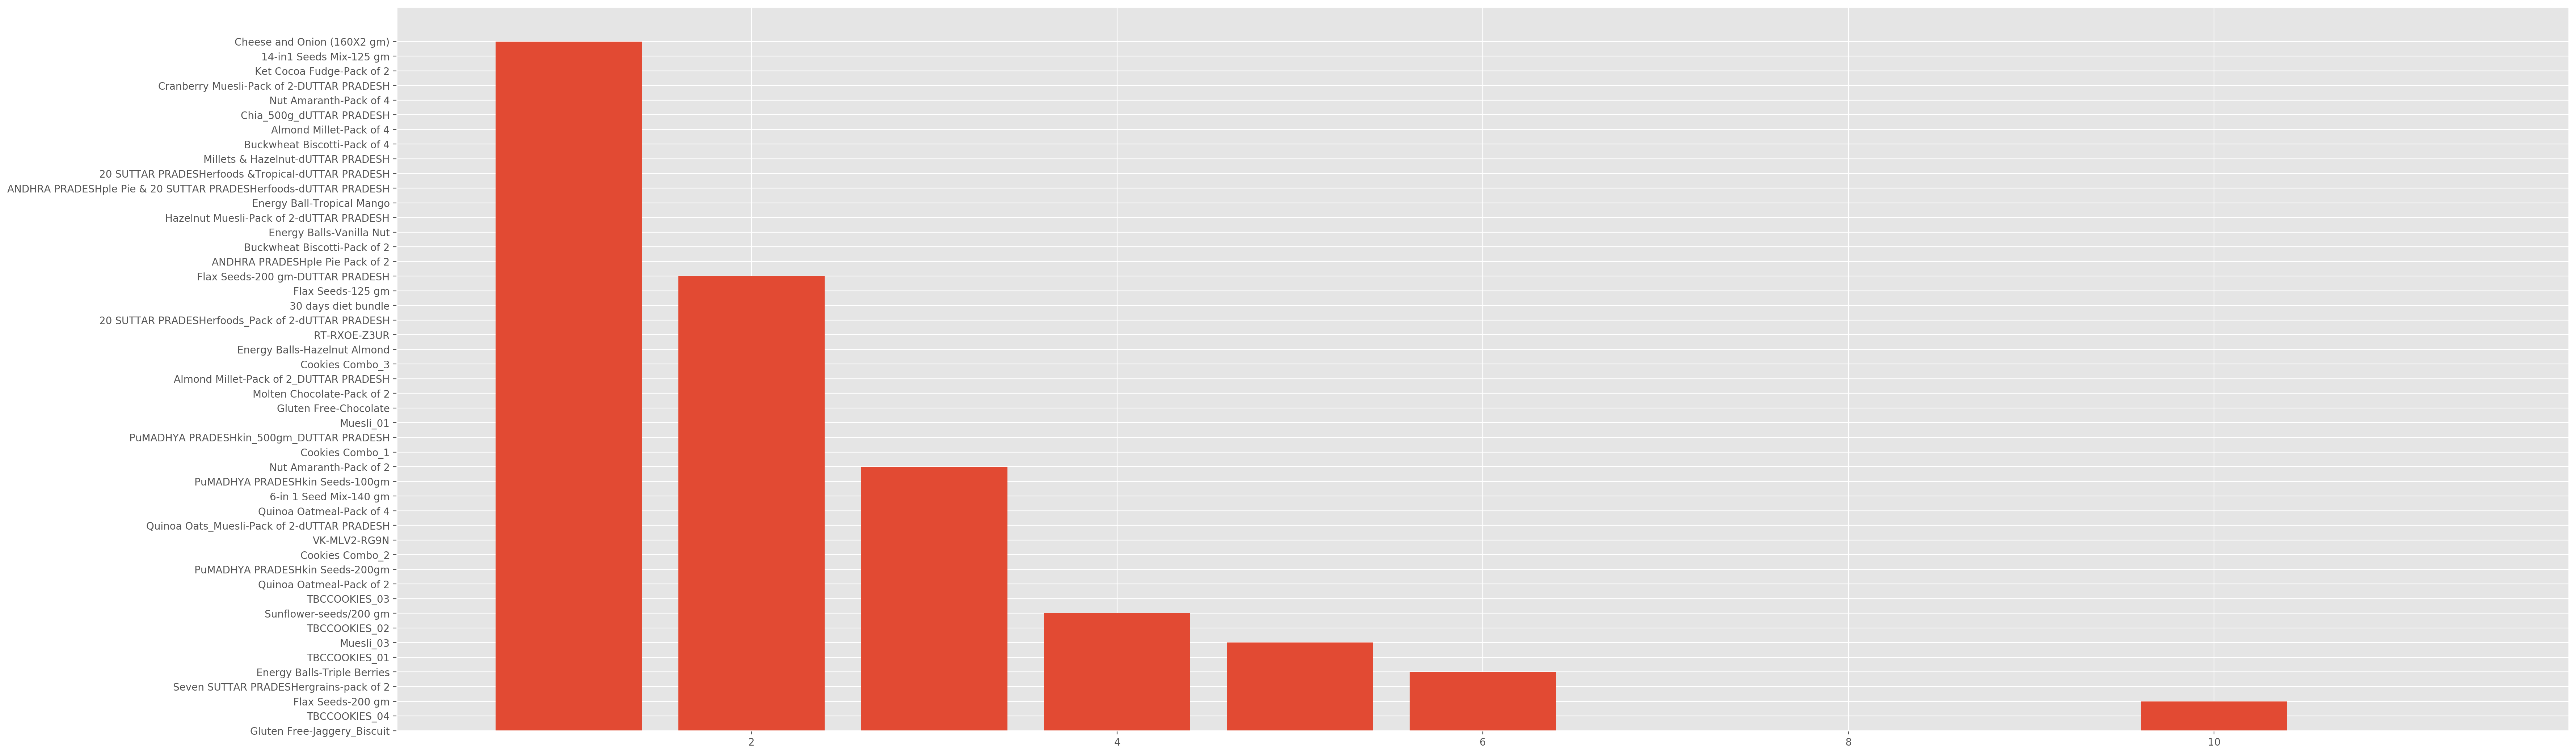

In [18]:
#This shows highest purchased sku and it's quantity
fig=plt.figure(figsize=(30,10),dpi=200)
axes=fig.add_axes([0,0,1,1])
plt.bar(data=most_sold,x=order["quantity-purchased"],height=order["sku"])
plt.show()

In [13]:
most_sku=order.groupby("sku")["quantity-purchased"].sum().sort_values(ascending=False).to_frame()
most_sku

,quantity-purchased
sku,
Gluten Free-Jaggery_Biscuit,713
TBCCOOKIES_04,404
Muesli_03,402
Cookies Combo_3,254
Muesli_01,173
Cookies Combo_1,153
PuMADHYA PRADESHkin Seeds-200gm,142
Sunflower-seeds/200 gm,138
VK-MLV2-RG9N,122


In [21]:
most_sku.style.background_gradient(cmap="Greens")

,quantity-purchased
sku,
Gluten Free-Jaggery_Biscuit,713
TBCCOOKIES_04,404
Muesli_03,402
Cookies Combo_3,254
Muesli_01,173
Cookies Combo_1,153
PuMADHYA PRADESHkin Seeds-200gm,142
Sunflower-seeds/200 gm,138
VK-MLV2-RG9N,122


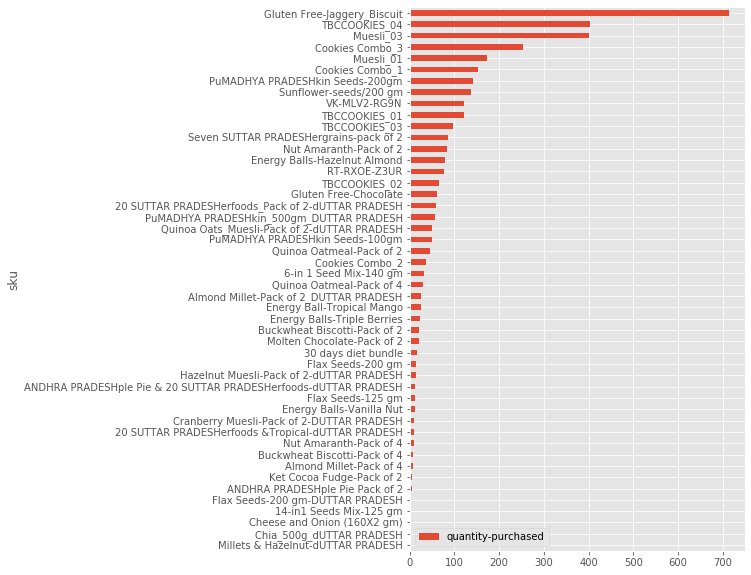

In [14]:
most_sku.sort_values(by="quantity-purchased",ascending=True).plot(kind='barh', figsize=(6,10))
plt.show()

In [27]:
#Most SKU purchased by State
import plotly
import plotly.express as px
import plotly.graph_objects as go
order.sort_values(by='quantity-purchased', ascending=False)
fig=go.Figure()
fig.add_trace(go.Bar(x=order['sku'],y=order['ship-state']))
fig.update_layout(title='Most SKU purchased by State',xaxis=dict(title='SKU NAME'),yaxis=dict(title='Quantity Purchased'))


In [31]:
#To find out all the products bought by customers from each state
States=order.groupby("ship-state")["sku"].sum().sort_values(ascending=False).to_frame()
States.style.background_gradient(cmap="Greens")

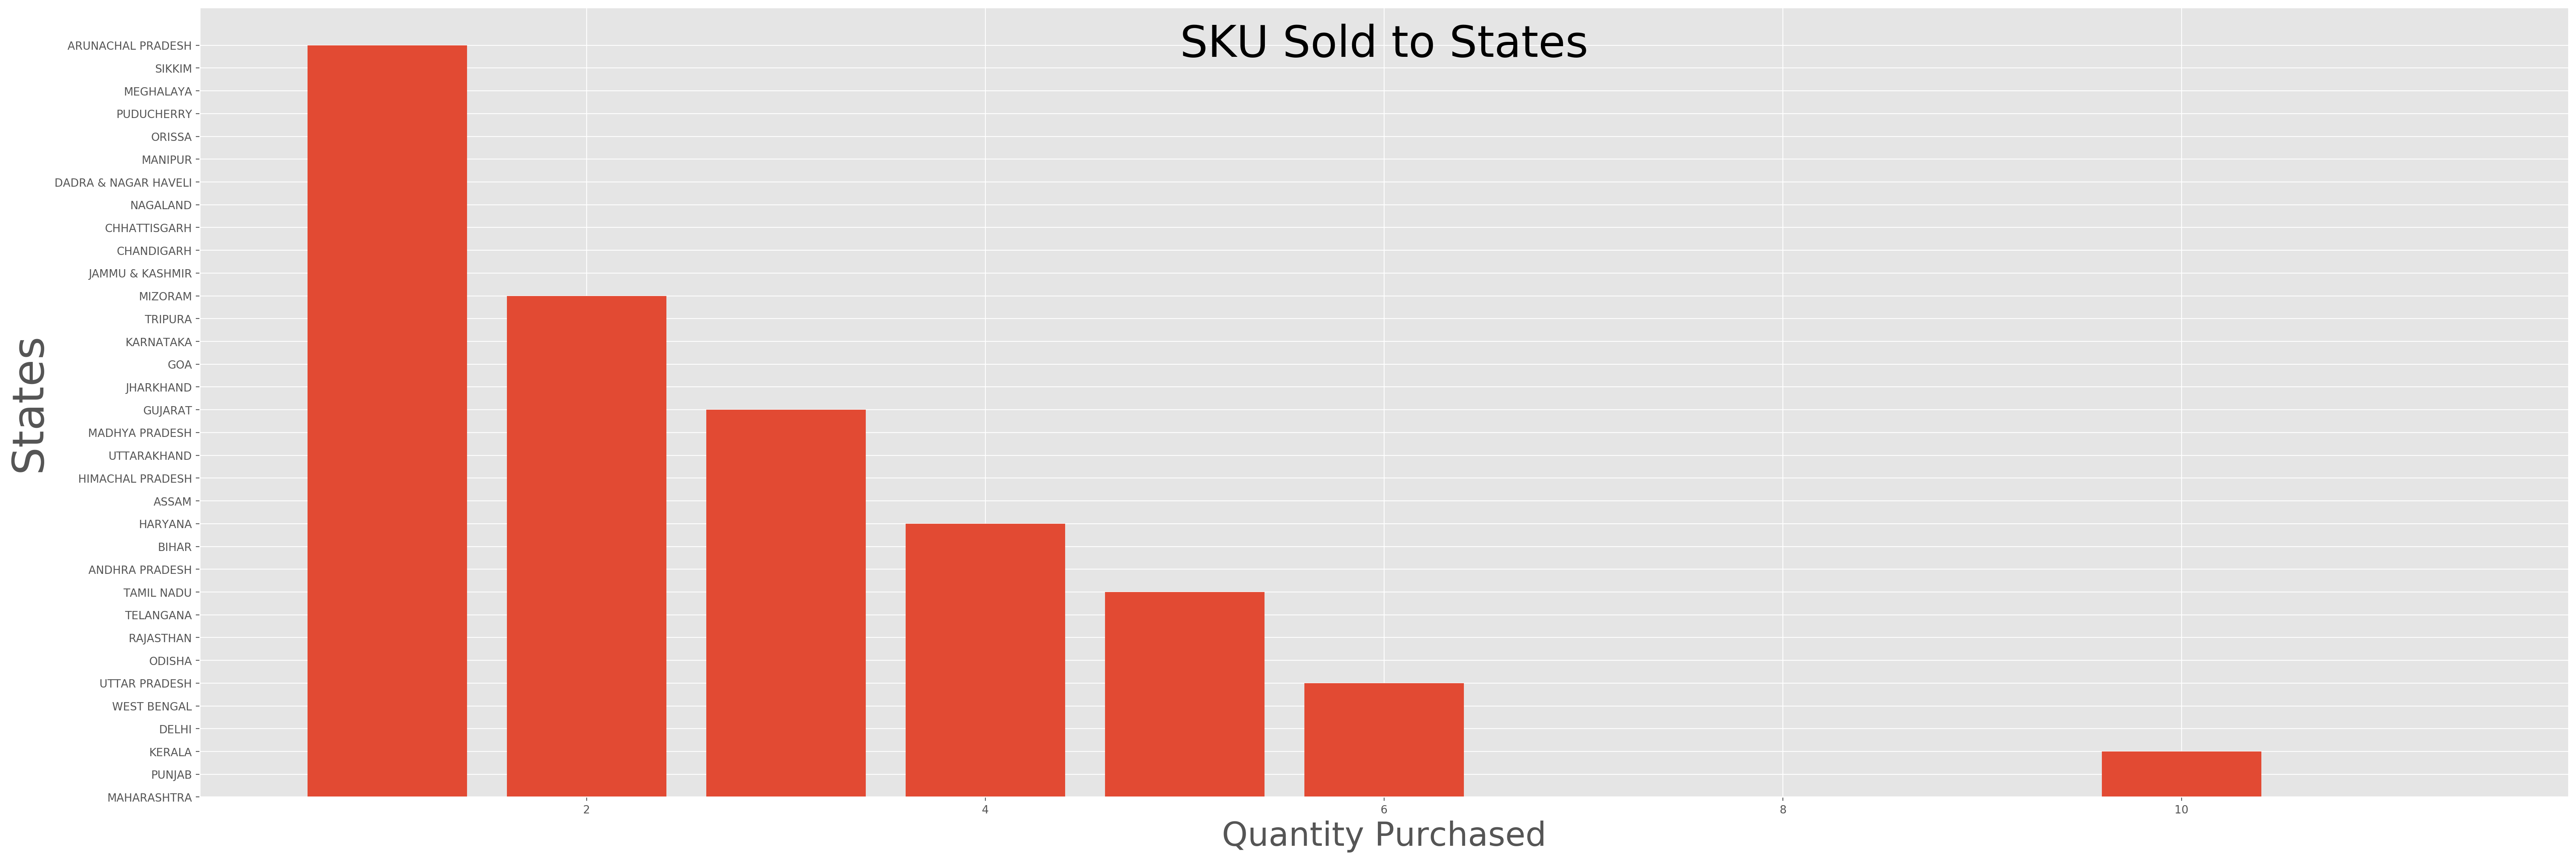

In [36]:
fig=plt.figure(figsize=(30,10),dpi=200)
axes=fig.add_axes([0,0,1,1])
plt.bar(data=most_sold,x=order["quantity-purchased"],height=order["ship-state"])
plt.xlabel('Quantity Purchased', fontsize=30)
plt.ylabel('States', fontsize=40)
fig.suptitle('SKU Sold to States', fontsize=40)
plt.show()